HARRY KABODHA (MS_BME) APMA4300 FINAL

In [178]:
from sympy import symbols, expand
from sympy.polys.polyfuncs import interpolate
from sympy import integrate
import numpy as np
from scipy.optimize import line_search
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve




PROBLEM 1

In [179]:
# Define the symbol
x = symbols('x')

# Given points
points = [(0, 2), (1, 1), (2, 2), (3, 8)]

# Interpolate the polynomial
p_x = interpolate(points, x)

# Expand the polynomial for clarity
p_x_expanded = expand(p_x)

p_x_expanded



x**3/2 - x**2/2 - x + 2

In [180]:

# Integrating p(x) from 0 to 2
integral_value = integrate(p_x_expanded, (x, 0, 2))

# Degree and leading coefficient
degree = p_x_expanded.as_poly().degree()
leading_coefficient = p_x_expanded.as_poly().LC()

integral_value, degree, leading_coefficient




(8/3, 3, 1/2)

PROBLEM 2

GRADIENT DESCENT

The minimum found by steepest descent from the first starting point (1.75, 0) is at: [ 1.7036067  -0.79608356]
The minimum found by steepest descent from the second starting point (0.375, 0) is at: [ 0.08984194 -0.7126564 ]


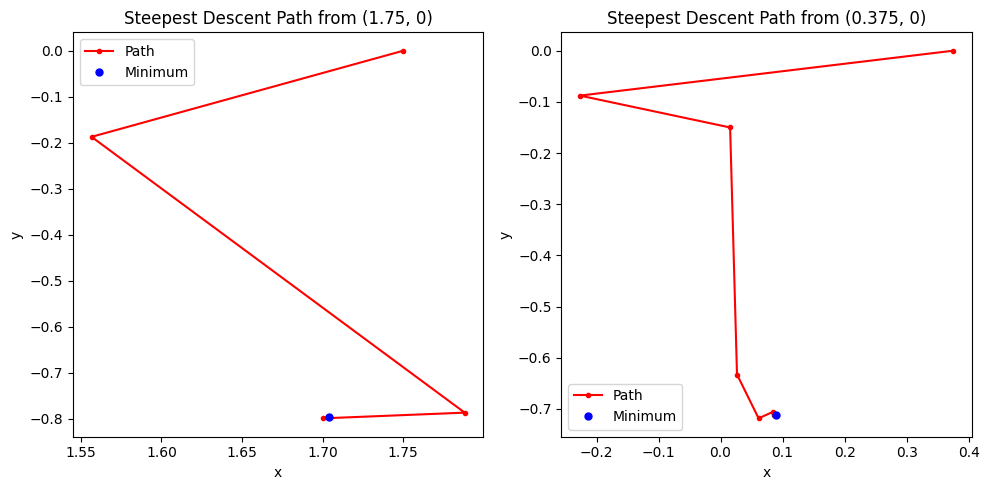

In [181]:
# Define the function to minimize (from Problem 2)
def f(xy):
    x, y = xy
    return (4 - 2.1*x**2 + x**4/3)*x**2 + x*y + 4*(y**2 - 1)*y**2

# Define the gradient of the function
def grad_f(xy):
    x, y = xy
    dfdx = 8*x - 8.4*x**3 + 2*x**5 + y
    dfdy = x - 8*y + 16*y**3
    return np.array([dfdx, dfdy])

# Steepest Descent Algorithm that also tracks the path
def steepest_descent(f, grad_f, xy0, n_max, eps1, eps2):
    iter_count = 0
    xy = np.array(xy0, dtype=float)
    path = [xy]  # Initialize list to store the path of points
    d = -grad_f(xy)
    err1 = 2*eps1
    err2 = np.linalg.norm(d)
    
    while err1 > eps1 and err2 > eps2 and iter_count < n_max:
        a = line_search(f, grad_f, xy, d)[0]
        if a is None:
            a = 1e-4
        
        xy_new = xy + a * d
        path.append(xy_new)  # Store the new point in the path
        
        err1 = np.linalg.norm(xy_new - xy)
        err2 = np.linalg.norm(grad_f(xy_new))
        
        xy = xy_new
        d = -grad_f(xy)
        
        iter_count += 1

    return xy, np.array(path)

# Parameters
n_max = 1000
eps1 = 1e-6
eps2 = 1e-6

# Perform Steepest Descent Optimization from both starting points and track the path
minimum1, path1 = steepest_descent(f, grad_f, [1.75, 0], n_max, eps1, eps2)
minimum2, path2 = steepest_descent(f, grad_f, [0.375, 0], n_max, eps1, eps2)

#Print Steepest Descent both starting points.
print(f"The minimum found by steepest descent from the first starting point (1.75, 0) is at: {minimum1}")
print(f"The minimum found by steepest descent from the second starting point (0.375, 0) is at: {minimum2}")
# Plot the path for both starting points
plt.figure(figsize=(10, 5))

# Path for the first starting point
plt.subplot(1, 2, 1)
plt.plot(path1[:, 0], path1[:, 1], 'ro-', markersize=3, label='Path')
plt.plot(minimum1[0], minimum1[1], 'bo', markersize=5, label='Minimum')
plt.title('Steepest Descent Path from (1.75, 0)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Path for the second starting point
plt.subplot(1, 2, 2)
plt.plot(path2[:, 0], path2[:, 1], 'ro-', markersize=3, label='Path')
plt.plot(minimum2[0], minimum2[1], 'bo', markersize=5, label='Minimum')
plt.title('Steepest Descent Path from (0.375, 0)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


PROBLEM 3

In [182]:
# Given values
N = 7  # The size of the data set excluding the fixed endpoints
q = 3  # The value from a previous problem
# Homework scores normalized to a scale of 0 to 1
f = np.array([12.5/20, 14/20, 16/20, 15/20, 14/20, 14/20, 12/19, 14.5/20])
lambda_value = N / (q + 7)

# Construct the A matrix
A = np.diag([1 + 2*lambda_value] * (N - 1)) + np.diag([-lambda_value] * (N - 2), 1) + np.diag([-lambda_value] * (N - 2), -1)
A[0, 0] = 1 + lambda_value  # Adjust the first row because u_1 is fixed
A[-1, -1] = 1 + lambda_value  # Adjust the last row because u_{N+1} is fixed

# Construct the b vector
b = f[1:-1]  # Take f_2 to f_N
b[0] += lambda_value * f[0]  # Adjust the first entry because of u_1 = f_1
b[-1] += lambda_value * f[-1]  # Adjust the last entry because of u_{N+1} = f_{N+1}

# Solve the linear system
u = np.linalg.solve(A, b)

# Construct the full smoother representation including the fixed endpoints
u_full = np.insert(u, 0, f[0])  # Insert u_1 at the beginning
u_full = np.append(u_full, f[-1])  # Append u_{N+1} at the end

A, b, u_full



(array([[ 1.7, -0.7,  0. ,  0. ,  0. ,  0. ],
        [-0.7,  2.4, -0.7,  0. ,  0. ,  0. ],
        [ 0. , -0.7,  2.4, -0.7,  0. ,  0. ],
        [ 0. ,  0. , -0.7,  2.4, -0.7,  0. ],
        [ 0. ,  0. ,  0. , -0.7,  2.4, -0.7],
        [ 0. ,  0. ,  0. ,  0. , -0.7,  1.7]]),
 array([1.1375    , 0.8       , 0.75      , 0.7       , 0.7       ,
        1.13907895]),
 array([0.625     , 1.02337886, 0.86034865, 0.7835308 , 0.75461411,
        0.80371756, 1.00098897, 0.725     ]))

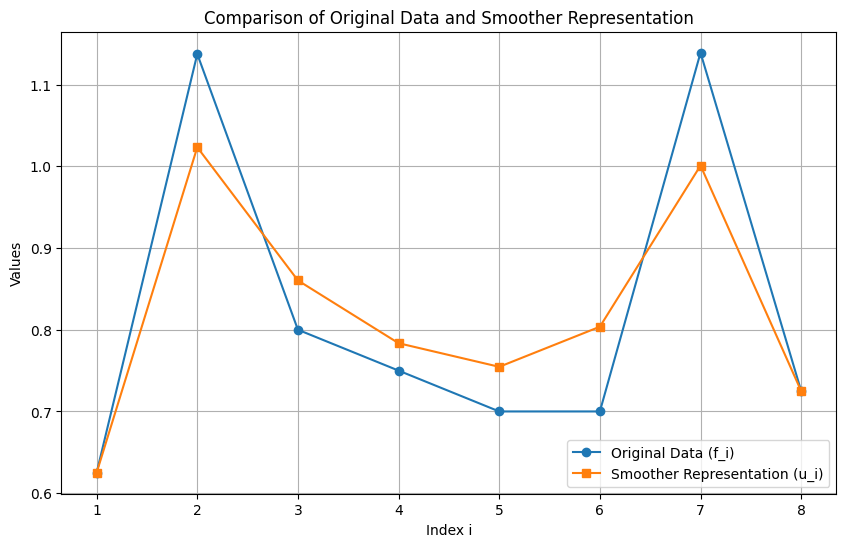

In [183]:
# Assuming N = 7 and I have 8 data points including the fixed endpoints
indices = np.arange(1, 9)  # Adjust to match the length of f and u_full

# Plot the original data and the smoother representation
plt.figure(figsize=(10, 6))
plt.plot(indices, f, 'o-', label='Original Data (f_i)')
plt.plot(indices, u_full, 's-', label='Smoother Representation (u_i)')

plt.xlabel('Index i')
plt.ylabel('Values')
plt.title('Comparison of Original Data and Smoother Representation')
plt.legend()
plt.grid(True)
plt.show()


PROBLEM 4

In [184]:
# Parameters
sigma = 10
rho = 28
beta = 8/3
t0 = 0  # Start time
t1 = 100  # End time
N = 10000  # Number of steps

# Initial conditions
initial_conditions_1 = (-2, -11, 2)  # Corresponds to the first set
initial_conditions_2 = (2, 1, 12)    # Corresponds to the second set


In [185]:
#define Lorenz system
def lorenz_system(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])




In [186]:
#Euler Method
def euler_method(system, initial_conditions, t0, t1, N, sigma, rho, beta):
    h = (t1 - t0) / N
    t = t0
    w = np.array(initial_conditions)
    trajectory = [w]

    for i in range(1, N + 1):
        w = w + h * system(t, w, sigma, rho, beta)
        t = t0 + i * h
        trajectory.append(w)

    return np.array(trajectory)


In [187]:
#RK-4
def runge_kutta_method(system, initial_conditions, t0, t1, N, sigma, rho, beta):
    h = (t1 - t0) / N
    t = t0
    w = np.array(initial_conditions)
    trajectory = [w]

    for i in range(1, N + 1):
        k1 = h * system(t, w, sigma, rho, beta)
        k2 = h * system(t + h/2, w + k1/2, sigma, rho, beta)
        k3 = h * system(t + h/2, w + k2/2, sigma, rho, beta)
        k4 = h * system(t + h, w + k3, sigma, rho, beta)
        
        w = w + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t0 + i * h
        trajectory.append(w)

    return np.array(trajectory)


In [188]:
# Apply the methods
euler_traj_1 = euler_method(lorenz_system, initial_conditions_1, t0, t1, N, sigma, rho, beta)
rk_traj_1 = runge_kutta_method(lorenz_system, initial_conditions_1, t0, t1, N, sigma, rho, beta)

euler_traj_2 = euler_method(lorenz_system, initial_conditions_2, t0, t1, N, sigma, rho, beta)
rk_traj_2 = runge_kutta_method(lorenz_system, initial_conditions_2, t0, t1, N, sigma, rho, beta)

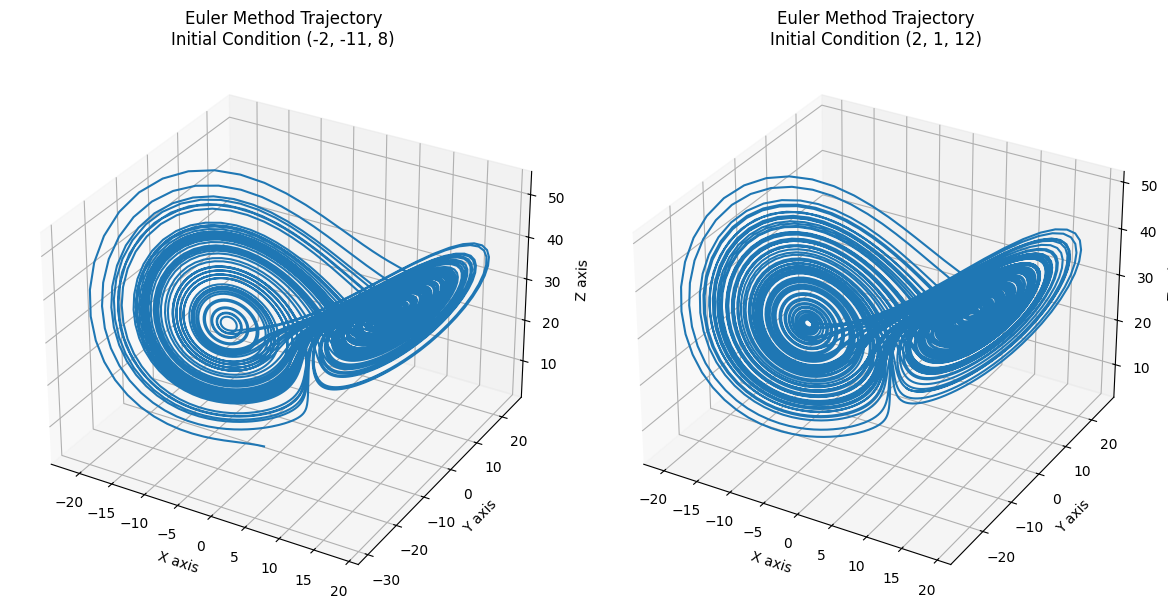

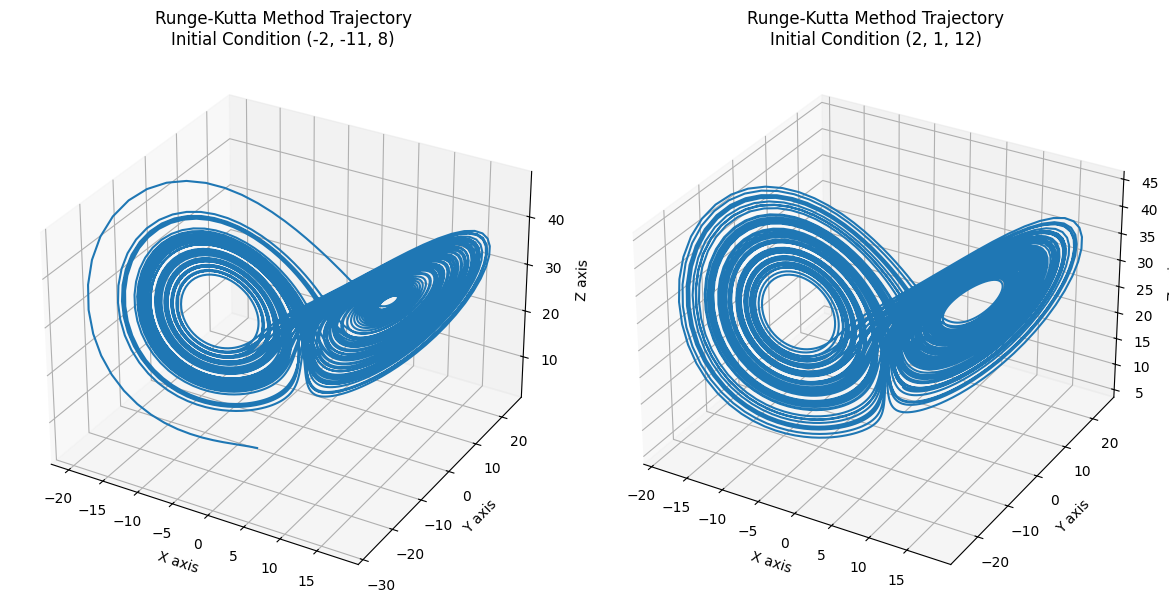

In [189]:
# Plotting the results of Euler's and RK4 methods

# Euler's Method Plot for the first initial condition set
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(euler_traj_1[:, 0], euler_traj_1[:, 1], euler_traj_1[:, 2])
ax1.set_title('Euler Method Trajectory\nInitial Condition (-2, -11, 8)')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

# Euler's Method Plot for the second initial condition set
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(euler_traj_2[:, 0], euler_traj_2[:, 1], euler_traj_2[:, 2])
ax2.set_title('Euler Method Trajectory\nInitial Condition (2, 1, 12)')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')

plt.tight_layout()
plt.show()

# Runge-Kutta Method Plot for the first initial condition set
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(rk_traj_1[:, 0], rk_traj_1[:, 1], rk_traj_1[:, 2])
ax1.set_title('Runge-Kutta Method Trajectory\nInitial Condition (-2, -11, 8)')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

# Runge-Kutta Method Plot for the second initial condition set
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(rk_traj_2[:, 0], rk_traj_2[:, 1], rk_traj_2[:, 2])
ax2.set_title('Runge-Kutta Method Trajectory\nInitial Condition (2, 1, 12)')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')

plt.tight_layout()
plt.show()


PROBLEM 5

In [190]:
def inverse_power_method(A, x, tol, N):
    k = 0
    x = b / np.linalg.norm(b, np.inf)
    q = (x.T @ A @ x) / (x.T @ x)
    mu_values = []

    while k < N:
        k += 1
        y = np.linalg.solve(A - q * np.eye(A.shape[0]), x)
        
        mu = y[np.argmax(np.abs(y))]
        ERR = np.linalg.norm(x - y / mu, np.inf)
        
        x = y / mu
        mu_values.append(1 / mu + q)
        
        if ERR < tol:
            return (1 / mu) + q, x, mu_values

    print("Maximum number of iterations exceeded")
    return q, x, mu_values


In [191]:
def power_method(A, x, tol, N):
    k = 0
    x = b / np.linalg.norm(b, np.inf)
    mu_values = []

    while k < N:
        k += 1
        y = A @ x
        mu = y[np.argmax(np.abs(y))]
        
        ERR = np.linalg.norm(x - y / mu, np.inf)
        x = y / mu
        mu_values.append(mu)
        
        if ERR < tol:
            return mu, x, mu_values

    print("The maximum number of iterations exceeded")
    return mu, x, mu_values


Eigenvalue: 13.705768525506272
Eigenvector: [ 0.13539874 -0.47832368  1.        ]
Eigenvalue: 13.705765176871697
Eigenvector: [ 0.13539998 -0.47832208  1.        ]


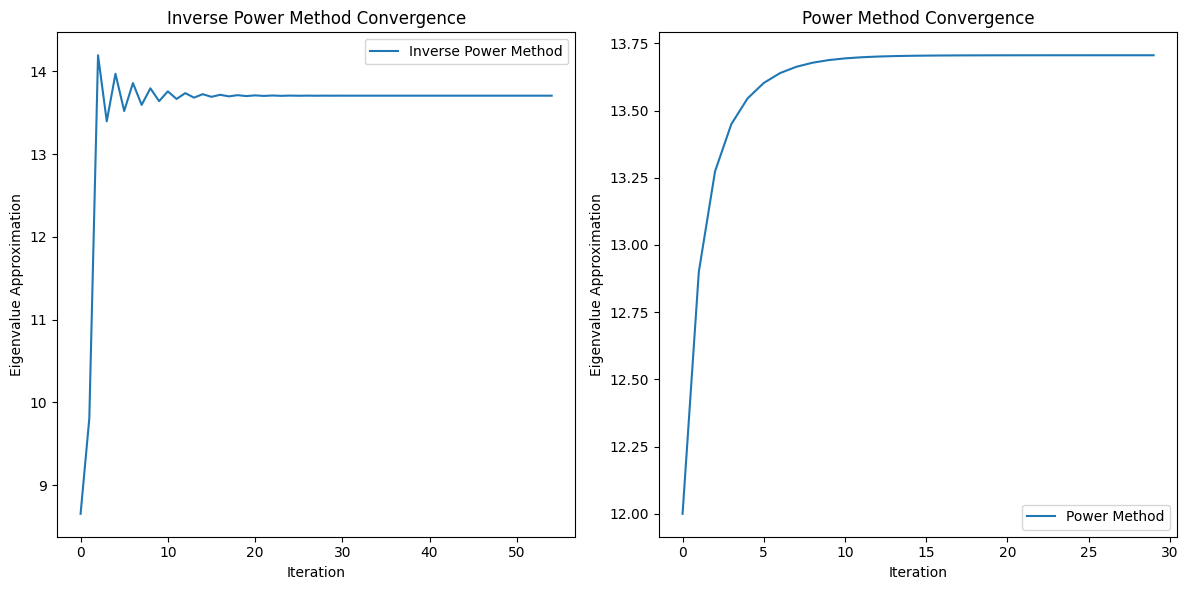

In [192]:
#Initialize
A = np.array([[6, 2, 2], [2, 8, -3], [2, -3, 12]], dtype=float)
import numpy as np

# Given vector b
b = np.array([3, 2, 10], dtype=float)

tol = 1e-6  # Tolerance
N = 1000  # Maximum number of iterations

# Apply the modified Inverse Power Method
mu_inverse, x_inverse, mu_values_inverse = inverse_power_method(A, x, tol, N)
print("Eigenvalue:", mu_inverse)
print("Eigenvector:", x_inverse)

# Apply the modified Power Method
mu_power, x_power, mu_values_power = power_method(A, x, tol, N)
print("Eigenvalue:", mu_power)
print("Eigenvector:", x_power)



# Plot the sequence of estimated eigenvalues
plt.figure(figsize=(12, 6))

# Inverse Power Method plot
plt.subplot(1, 2, 1)
plt.plot(mu_values_inverse, label='Inverse Power Method')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue Approximation')
plt.title('Inverse Power Method Convergence')
plt.legend()

# Power Method plot
plt.subplot(1, 2, 2)
plt.plot(mu_values_power, label='Power Method')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue Approximation')
plt.title('Power Method Convergence')
plt.legend()

plt.tight_layout()
plt.show()


In [193]:
# Given matrix A and its known eigenvalue
A = np.array([[6, 2, 2], [2, 8, -3], [2, -3, 12]], dtype=float)
known_eigenvalue = 13.70577

# Calculate the trace of A
trace_A = np.trace(A)

# Calculate the sum of the remaining eigenvalues
sum_remaining_eigenvalues = trace_A - known_eigenvalue

# Display the result
print("Sum of the remaining eigenvalues:", sum_remaining_eigenvalues)


Sum of the remaining eigenvalues: 12.29423


In [194]:
# Calculate the determinant of A
det_A = np.linalg.det(A)

# Calculate the coefficients of the quadratic equation
a = 1
b = -(trace_A - known_eigenvalue)
c = det_A / known_eigenvalue

# Solve the quadratic equation
remaining_eigenvalues = np.roots([a, b, c])

# Display the remaining eigenvalues
lambda_2, lambda_3 = remaining_eigenvalues
print("Remaining eigenvalues:", lambda_2, lambda_3)


Remaining eigenvalues: 8.846914759251453 3.447315240748549


PROBLEM 6

In [195]:
#Checking if matrix A is tridiagonal
def is_tridiagonal(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        return False  # Matrix is not square
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if abs(i - j) > 1 and matrix[i, j] != 0:
                return False  # Non-zero element found outside the three diagonals
    
    return True

# Example usage:
A = np.array([[6, 2, 2], [2, 8, -3], [2, -3, 12]])  # Replace with your matrix

print("Is the matrix A tridiagonal?", is_tridiagonal(A))

Is the matrix A tridiagonal? False


In [196]:
# Converting A to a tridiagonal matrix
T, Q = hessenberg(A, calc_q=True)

T


array([[ 6.        , -2.82842712,  0.        ],
       [-2.82842712,  7.        , -2.        ],
       [ 0.        , -2.        , 13.        ]])

eigenvalues [13.70576802  8.84691719  3.44731479]


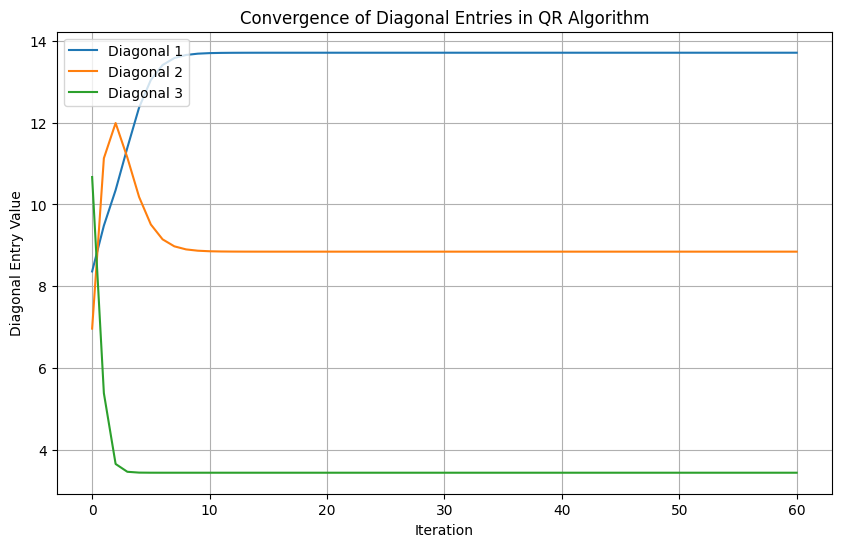

In [197]:
#QR Algorithm
def qr_algorithm_with_plot(A, tol=1e-10, max_iter=1000):
    n = A.shape[0]
    A = A.astype(float)
    diagonals = np.zeros((max_iter, n))  # Storage for diagonal elements at each iteration
    for i in range(max_iter):
        # Perform QR decomposition
        Q, R = np.linalg.qr(A)
        # Form next iterate
        A = R @ Q
        # Store the diagonal elements
        diagonals[i, :] = np.diagonal(A)
        # Check for convergence: if the off-diagonal elements are smaller than the tolerance
        off_diagonal = A - np.diag(np.diagonal(A))
        if np.all(np.abs(off_diagonal) < tol):
            # Convergence achieved
            return np.diagonal(A), diagonals[:i+1, :]
    # If the function hasn't returned within the max_iter, convergence wasn't achieved
    raise ValueError("Convergence not achieved within the maximum number of iterations")

# Run the QR algorithm and get the diagonal entries at each iteration
eigenvalues, diagonal_entries = qr_algorithm_with_plot(T)
print("eigenvalues", eigenvalues)

# Plot the diagonal entries over iterations
plt.figure(figsize=(10, 6))
for i in range(diagonal_entries.shape[1]):
    plt.plot(diagonal_entries[:, i], label=f'Diagonal {i+1}')
plt.xlabel('Iteration')
plt.ylabel('Diagonal Entry Value')
plt.title('Convergence of Diagonal Entries in QR Algorithm')
plt.legend()
plt.grid(True)
plt.show()


PROBLEM 7

FORWARD EULER

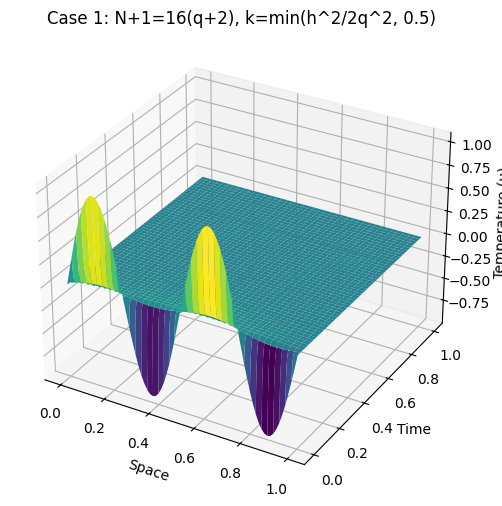

In [198]:
# Parameters
q = 3
N = 16 * (q + 2) - 1  # Spatial points for the case (N+1 = 16*(q+2))
h = 1 / (N + 1)  # Spatial step size

# Calculate time step using stability condition, I ensured it's not larger than 0.5
k = min(h**2 / (2 * q**2), 0.5)  # Enforce stability

# Ensure K is the desired total simulation time
K = 1  # Total simulation time

# Initialize spatial grid
x = np.linspace(0, 1, N + 2)

# Apply initial conditions
u_initial = 1 / (q + 1) * x * (1 - x) + np.sin((q + 1) * np.pi * x)

# Forward Euler method for time-stepping
def forward_euler(u, h, k, N):
    u_next = np.copy(u)
    # Update interior points using Forward Euler scheme
    for j in range(1, N + 1):
        u_next[j] = u[j] + k * (u[j - 1] - 2 * u[j] + u[j + 1]) / h**2
    return u_next

# Run simulation
time_steps = int(K / k) + 1  # Number of time steps
u_matrix = np.zeros((time_steps, N + 2))  # Solution matrix
u_matrix[0, :] = u_initial  # Set initial condition

# Perform the time-stepping simulation
for t in range(1, time_steps):
    u_matrix[t, :] = forward_euler(u_matrix[t - 1, :], h, k, N)

# Plotting function for 3D surface plot
def plot_solution(x, u_matrix, title):
    T, X = np.meshgrid(np.linspace(0, K, time_steps), x)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface with transposed u_matrix for correct orientation
    ax.plot_surface(X, T, u_matrix.T, cmap='viridis')
    ax.set_xlabel('Space')
    ax.set_ylabel('Time')
    ax.set_zlabel('Temperature (u)')
    ax.set_title(title)
    plt.show()

# Plot the results for this case
plot_solution(x, u_matrix, 'Case 1: N+1=16(q+2), k=min(h^2/2q^2, 0.5)')

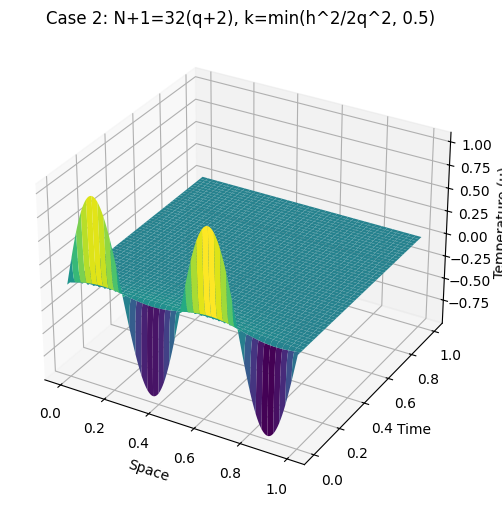

In [199]:
# Parameters
q = 3
N = 32 * (q + 2) - 1  # Spatial points for the case (N+1 = 16*(q+2))
h = 1 / (N + 1)  # Spatial step size

# Calculate time step using stability condition, I made sure it's not larger than 0.5
k = min(h**2 / (2 * q**2), 0.5)  # Enforce stability

# Ensure K is the desired total simulation time
K = 1  # Total simulation time

# Initialize spatial grid
x = np.linspace(0, 1, N + 2)

# Apply initial conditions
u_initial = 1 / (q + 1) * x * (1 - x) + np.sin((q + 1) * np.pi * x)

# Forward Euler method for time-stepping
def forward_euler(u, h, k, N):
    u_next = np.copy(u)
    # Update interior points using Forward Euler scheme
    for j in range(1, N + 1):
        u_next[j] = u[j] + k * (u[j - 1] - 2 * u[j] + u[j + 1]) / h**2
    return u_next

# Run simulation
time_steps = int(K / k) + 1  # Number of time steps
u_matrix = np.zeros((time_steps, N + 2))  # Solution matrix
u_matrix[0, :] = u_initial  # Set initial condition

# Perform the time-stepping simulation
for t in range(1, time_steps):
    u_matrix[t, :] = forward_euler(u_matrix[t - 1, :], h, k, N)

# Plotting function for 3D surface plot
def plot_solution(x, u_matrix, title):
    T, X = np.meshgrid(np.linspace(0, K, time_steps), x)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface with transposed u_matrix for correct orientation
    ax.plot_surface(X, T, u_matrix.T, cmap='viridis')
    ax.set_xlabel('Space')
    ax.set_ylabel('Time')
    ax.set_zlabel('Temperature (u)')
    ax.set_title(title)
    plt.show()

# Plot the results for this case
plot_solution(x, u_matrix, 'Case 2: N+1=32(q+2), k=min(h^2/2q^2, 0.5)')

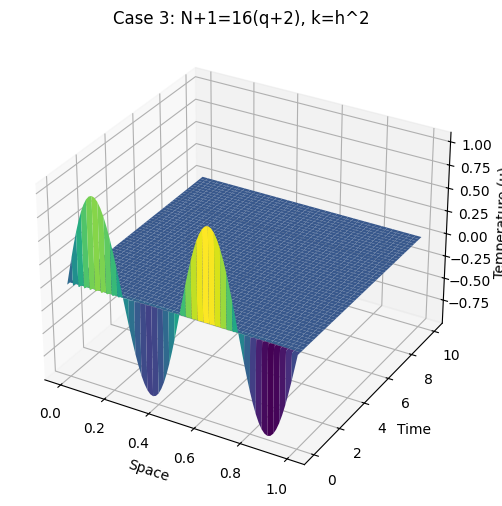

In [200]:
# Parameters
q = 3
N = 16 * (q + 2) - 1  # Example for one case (N+1 = 16*(q+2))
h = 1 / (N + 1)  # Calculate h
K = 10  # End time
k = min(h**2 / 2, 0.5)  # Enforce Stability

# Initialize grid
x = np.linspace(0, 1, N + 2)  # Spatial grid from x=0 to x=1

# Apply initial conditions
u_initial = 1 / (q + 1) * x * (1 - x) + np.sin((q + 1) * np.pi * x)

# Forward Euler method
def forward_euler(u, h, k):
    u_next = np.copy(u)
    for j in range(1, N + 1):
        u_next[j] = u[j] + k * (u[j - 1] - 2 * u[j] + u[j + 1]) / h**2
    return u_next

# Run simulation
time_steps = int(K / k) + 1
u_matrix = np.zeros((time_steps, N + 2))
u_matrix[0, :] = u_initial

for t in range(1, time_steps):
    u_matrix[t, :] = forward_euler(u_matrix[t - 1, :], h, k)

# Plotting function
def plot_solution(x, u_matrix, title):
    T, X = np.meshgrid(np.linspace(0, K, u_matrix.shape[0]), x)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    # Transpose u_matrix to align the dimensions with X and T for plotting
    ax.plot_surface(X, T, u_matrix.T, cmap='viridis')
    ax.set_xlabel('Space')
    ax.set_ylabel('Time')
    ax.set_zlabel('Temperature (u)')
    ax.set_title(title)
    plt.show()

# Plot the results for this case
plot_solution(x, u_matrix, 'Case 3: N+1=16(q+2), k=h^2')

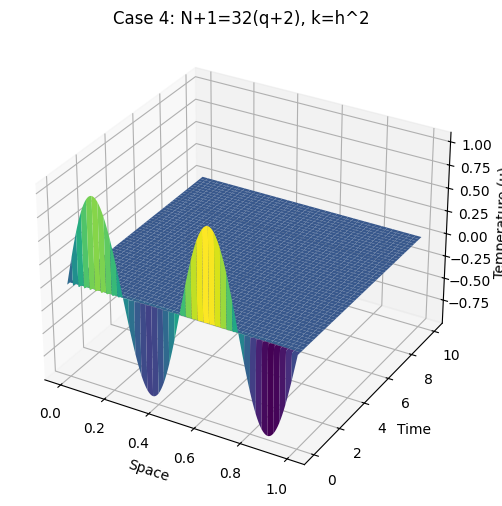

In [201]:
# Parameters
q = 3
N = 32 * (q + 2) - 1  # Example for one case (N+1 = 16*(q+2))
h = 1 / (N + 1)  # Calculate h
K = 10  # End time
k = min(h**2 / 2, 0.5)  #Enforce Stability

# Initialize grid
x = np.linspace(0, 1, N + 2)  # Spatial grid from x=0 to x=1

# Apply initial conditions
u_initial = 1 / (q + 1) * x * (1 - x) + np.sin((q + 1) * np.pi * x)

# Forward Euler method
def forward_euler(u, h, k):
    u_next = np.copy(u)
    for j in range(1, N + 1):
        u_next[j] = u[j] + k * (u[j - 1] - 2 * u[j] + u[j + 1]) / h**2
    return u_next

# Run simulation
time_steps = int(K / k) + 1
u_matrix = np.zeros((time_steps, N + 2))
u_matrix[0, :] = u_initial

for t in range(1, time_steps):
    u_matrix[t, :] = forward_euler(u_matrix[t - 1, :], h, k)

# Plotting function
def plot_solution(x, u_matrix, title):
    T, X = np.meshgrid(np.linspace(0, K, u_matrix.shape[0]), x)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    # Transpose u_matrix to align the dimensions with X and T for plotting
    ax.plot_surface(X, T, u_matrix.T, cmap='viridis')
    ax.set_xlabel('Space')
    ax.set_ylabel('Time')
    ax.set_zlabel('Temperature (u)')
    ax.set_title(title)
    plt.show()

# Plot the results for this case
plot_solution(x, u_matrix, 'Case 4: N+1=32(q+2), k=h^2')

BACKWARD EULER

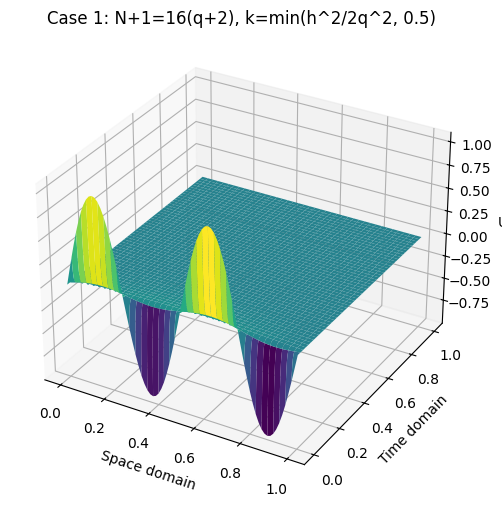

In [202]:
# Parameters
q = 3
N = 16 * (q + 2) - 1  # Spatial points for the case (N+1 = 16*(q+2))
h = 1 / (N + 1)  # Spatial step size
k = min(h**2 / (2 * q**2), 0.5)  # Time step size, enforce stability
K = 1  # Total simulation time

# Initialize spatial grid and initial conditions
x = np.linspace(0, 1, N + 2)
u_initial = 1 / (q + 1) * x * (1 - x) + np.sin((q + 1) * np.pi * x)

# Define the tridiagonal matrix for the Backward Euler method
diagonal = (1 + 2 * k / h**2) * np.ones(N)
off_diagonal = -k / h**2 * np.ones(N - 1)
ab = np.zeros((3, N))
ab[0, 1:] = off_diagonal  # Upper diagonal
ab[1] = diagonal  # Main diagonal
ab[2, :-1] = off_diagonal  # Lower diagonal

# Number of time steps
time_steps = int(K / k) + 1

# Solution matrix
u_matrix = np.zeros((time_steps, N + 2))
u_matrix[0, :] = u_initial

# Backward Euler method for time-stepping
for t in range(1, time_steps):
    # The right-hand side includes the boundary conditions, which are zero
    rhs = u_matrix[t - 1, 1:-1]
    # Solve the linear system using banded matrix solver
    u_matrix[t, 1:-1] = solve_banded((1, 1), ab, rhs)

# Plotting the results
def plot_solution(x, u_matrix, k, title):
    T, X = np.meshgrid(np.linspace(0, K, time_steps), x)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, T, u_matrix.T, cmap='viridis')
    ax.set_xlabel('Space domain')
    ax.set_ylabel('Time domain')
    ax.set_zlabel('U')
    ax.set_title(title)
    plt.show()

# Plot the results
plot_solution(x, u_matrix, k, 'Case 1: N+1=16(q+2), k=min(h^2/2q^2, 0.5)')


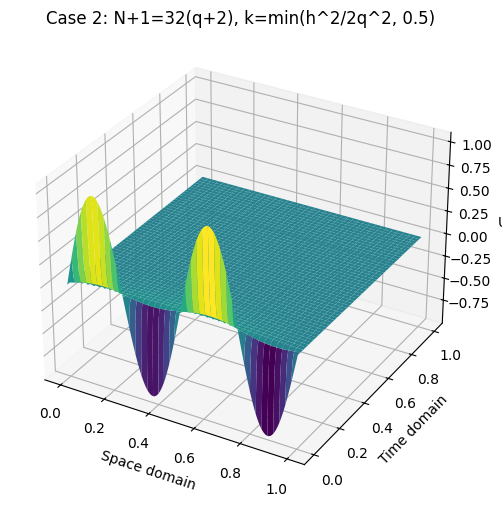

In [203]:
# Parameters
q = 3
N = 32 * (q + 2) - 1  # Spatial points for the case (N+1 = 32*(q+2))
h = 1 / (N + 1)  # Spatial step size
k = min(h**2 / (2 * q**2), 0.5)  # Time step size, enforce stability
K = 1  # Total simulation time

# Initialize spatial grid and initial conditions
x = np.linspace(0, 1, N + 2)
u_initial = 1 / (q + 1) * x * (1 - x) + np.sin((q + 1) * np.pi * x)

# Define the tridiagonal matrix for the Backward Euler method
diagonal = (1 + 2 * k / h**2) * np.ones(N)
off_diagonal = -k / h**2 * np.ones(N - 1)
ab = np.zeros((3, N))
ab[0, 1:] = off_diagonal  # Upper diagonal
ab[1] = diagonal  # Main diagonal
ab[2, :-1] = off_diagonal  # Lower diagonal

# Number of time steps
time_steps = int(K / k) + 1

# Solution matrix
u_matrix = np.zeros((time_steps, N + 2))
u_matrix[0, :] = u_initial

# Backward Euler method for time-stepping
for t in range(1, time_steps):
    # The right-hand side includes the boundary conditions, which are zero
    rhs = u_matrix[t - 1, 1:-1]
    # Solve the linear system using banded matrix solver
    u_matrix[t, 1:-1] = solve_banded((1, 1), ab, rhs)

# Plotting the results
def plot_solution(x, u_matrix, k, title):
    T, X = np.meshgrid(np.linspace(0, K, time_steps), x)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, T, u_matrix.T, cmap='viridis')
    ax.set_xlabel('Space domain')
    ax.set_ylabel('Time domain')
    ax.set_zlabel('U')
    ax.set_title(title)
    plt.show()

# Plot the results
plot_solution(x, u_matrix, k, 'Case 2: N+1=32(q+2), k=min(h^2/2q^2, 0.5)')


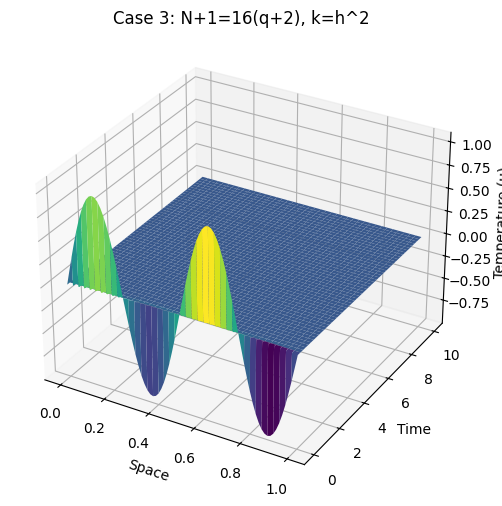

In [210]:
# Parameters
q = 3
N = 16 * (q + 2) - 1  # Spatial discretization (N+1 = 32*(q+2))
h = 1 / (N + 1)  # Spatial step size
K = 10  # Total time
k = min(h**2 / 2, 0.5)  # Time step size for stability

# Initialize spatial grid
x = np.linspace(0, 1, N + 2)

# Apply initial conditions
u_initial = 1 / (q + 1) * x * (1 - x) + np.sin((q + 1) * np.pi * x)

# Backward Euler method for time-stepping
def backward_euler(u, h, k, N):
    # Setup the coefficients for the tridiagonal matrix
    a = np.full(N, -k/h**2)  # Off-diagonal terms
    b = np.full(N, 1 + 2*k/h**2)  # Diagonal terms
    # The banded matrix for solve_banded
    ab = np.vstack((a, b, a))
    # Solve the system using solve_banded
    u_next = solve_banded((1, 1), ab, u[1:-1])
    # Add the boundary conditions
    return np.concatenate(([0], u_next, [0]))

# Run simulation
time_steps = int(K / k) + 1
u_matrix = np.zeros((time_steps, N + 2))
u_matrix[0, :] = u_initial

for t in range(1, time_steps):
    u_matrix[t, :] = backward_euler(u_matrix[t - 1, :], h, k, N)

# Plotting function
def plot_solution(x, u_matrix, title):
    T, X = np.meshgrid(np.linspace(0, K, u_matrix.shape[0]), x)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, T, u_matrix.T, cmap='viridis')
    ax.set_xlabel('Space')
    ax.set_ylabel('Time')
    ax.set_zlabel('Temperature (u)')
    ax.set_title(title)
    plt.show()

# Plot the results for this case
plot_solution(x, u_matrix, 'Case 3: N+1=16(q+2), k=h^2')


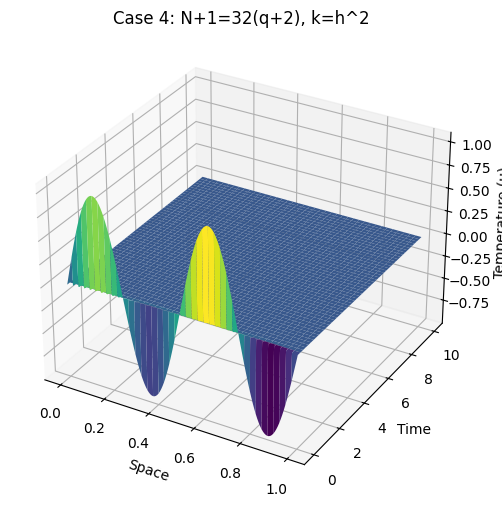

In [211]:
# Parameters
q = 3
N = 32 * (q + 2) - 1  # Spatial discretization (N+1 = 32*(q+2))
h = 1 / (N + 1)  # Spatial step size
K = 10  # Total time
k = min(h**2 / 2, 0.5)  # Time step size for stability

# Initialize spatial grid
x = np.linspace(0, 1, N + 2)

# Apply initial conditions
u_initial = 1 / (q + 1) * x * (1 - x) + np.sin((q + 1) * np.pi * x)

# Backward Euler method for time-stepping
def backward_euler(u, h, k, N):
    # Setup the coefficients for the tridiagonal matrix
    a = np.full(N, -k/h**2)  # Off-diagonal terms
    b = np.full(N, 1 + 2*k/h**2)  # Diagonal terms
    # The banded matrix for solve_banded
    ab = np.vstack((a, b, a))
    # Solve the system using solve_banded
    u_next = solve_banded((1, 1), ab, u[1:-1])
    # Add the boundary condition
    return np.concatenate(([0], u_next, [0]))

# Run simulation
time_steps = int(K / k) + 1
u_matrix = np.zeros((time_steps, N + 2))
u_matrix[0, :] = u_initial

for t in range(1, time_steps):
    u_matrix[t, :] = backward_euler(u_matrix[t - 1, :], h, k, N)

# Plotting Function
def plot_solution(x, u_matrix, title):
    T, X = np.meshgrid(np.linspace(0, K, u_matrix.shape[0]), x)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, T, u_matrix.T, cmap='viridis')
    ax.set_xlabel('Space')
    ax.set_ylabel('Time')
    ax.set_zlabel('Temperature (u)')
    ax.set_title(title)
    plt.show()

# Plot the results for this case
plot_solution(x, u_matrix, 'Case 4: N+1=32(q+2), k=h^2')


PROBLEM 8

Smallest Eigenvalue: 9.850
Number of iterations: 9
Eigenfunction values at grid points: [0.         0.00249736 0.00499364 0.00748774 0.00997856 0.012465
 0.01494592 0.01742021 0.01988674 0.02234437 0.02479196 0.02722836
 0.02965242 0.032063   0.03445894 0.0368391  0.03920231 0.04154744
 0.04387334 0.04617886 0.04846287 0.05072425 0.05296185 0.05517459
 0.05736134 0.05952102 0.06165255 0.06375485 0.06582688 0.0678676
 0.06987598 0.07185102 0.07379174 0.07569718 0.07756638 0.07939844
 0.08119244 0.08294752 0.08466282 0.08633753 0.08797083 0.08956197
 0.0911102  0.0926148  0.0940751  0.09549044 0.09686018 0.09818375
 0.09946057 0.10069013 0.10187191 0.10300545 0.10409033 0.10512613
 0.10611249 0.10704908 0.10793558 0.10877174 0.10955731 0.11029208
 0.11097588 0.11160856 0.11219002 0.11272016 0.11319895 0.11362636
 0.11400239 0.11432708 0.1146005  0.11482274 0.11499391 0.11511416
 0.11518367 0.11520261 0.11517122 0.11508972 0.11495839 0.11477751
 0.11454739 0.11426834 0.11394071 0.11356486

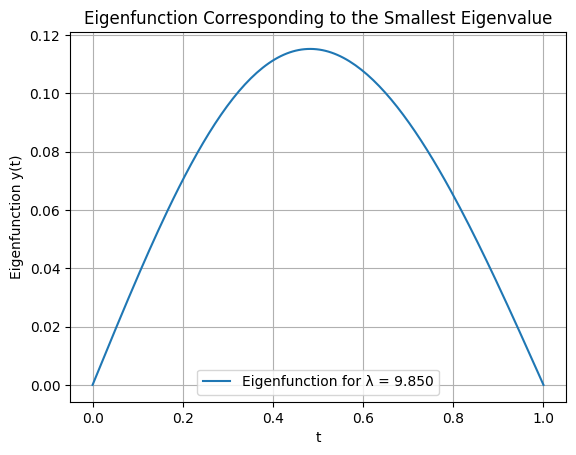

In [206]:
# Parameters
N = 150  # Number of interior points
h = 1 / (N + 1)  # Step size
q = 3

# Create the grid points
t = np.linspace(h, 1 - h, N)

# Construct tridiagonal matrix A
diagonals_A = [2 * np.ones(N), -1 * np.ones(N - 1), -1 * np.ones(N - 1)]
A = diags(diagonals_A, [0, -1, 1], format='csc') / h**2

# Construct diagonal matrix B with the coefficients from the BVP equation
coefficients_B = 1 + (1 / q**2) * np.sin(2 * np.pi * t)
B = diags([coefficients_B], [0], format='csc')

# Inverse power method
tol = 1e-6  # Convergence tolerance
max_iterations = 100  
x_old = np.random.rand(N)  # Initial guess for eigenvector
x_old /= np.linalg.norm(x_old)  # Normalize the initial vector

# Start the inverse power method iterations
for iteration in range(max_iterations):
    # Solve (A - mu B)x_new = Bx_old for x_new, where mu is a small shift
    x_new = spsolve(A - diags([np.ones(N)], [0], format='csc') * 0.1, B.dot(x_old))

    # Normalize x_new
    x_new /= np.linalg.norm(x_new)

    # Check for convergence
    if np.linalg.norm(x_new - x_old) < tol:
        break

    x_old = x_new

# Calculate the smallest eigenvalue using the Rayleigh quotient
smallest_eigenvalue = (x_new.T @ (A @ x_new)) / (x_new.T @ (B @ x_new))

# Output the result
print(f"Smallest Eigenvalue: {smallest_eigenvalue:.3f}")
print(f"Number of iterations: {iteration + 1}")
print(f"Eigenfunction values at grid points: {y}")

# Construct the eigenfunction (including boundary conditions)
y = np.zeros(N + 2)
y[1:-1] = x_new  # Interior points

# Plot the eigenfunction as a function of t
plt.plot(np.linspace(0, 1, N + 2), y, label=f"Eigenfunction for λ = {smallest_eigenvalue:.3f}")
plt.title('Eigenfunction Corresponding to the Smallest Eigenvalue')
plt.xlabel('t')
plt.ylabel('Eigenfunction y(t)')
plt.legend()
plt.grid(True)
plt.show()


PROBLEM 10 (A)

In [209]:
# Define a simple network as an adjacency matrix
#Network of 4 nodes with the following connections:
adjacency_matrix = np.array([
    [0, 1, 0, 1],  # Node 1 is connected to Node 2 & 4
    [1, 0, 1, 0],  # Node 2 is cinnected to node 1 & 3
    [0, 1, 0, 0],  # Node 3 is connected to Node 2
    [1, 0, 0, 0]   # Node 4 is connected to Node 1
])

# Initialize the eigenvector with equal entries (could be random)
eigenvector = np.array([1.0, 1.0, 1.0, 1.0])

# Define the number of iterations for the power method
iterations = 100

# Apply the power iteration method to find the principal eigenvector
for _ in range(iterations):
    # Multiply the current eigenvector by the adjacency matrix
    eigenvector = np.dot(adjacency_matrix, eigenvector)
    # Normalize the eigenvector
    eigenvector /= np.linalg.norm(eigenvector)

# The resulting eigenvector now holds the centrality scores, where a higher score implies greater influence in the network.
print(eigenvector)


[0.60150096 0.60150096 0.37174803 0.37174803]


PROBLEM 10(C)

In [208]:
# Define the adjacency matrix for the network of 5 amino acids
# Amino acid 1 interacts with all others (value 1), and others do not interact (value 0).
adjacency_matrix = np.array([
    [0, 1, 1, 1, 1],  # Amino acid 1 interacts with 2, 3, 4, and 5
    [1, 0, 0, 0, 0],  # Amino acid 2 interacts only with 1
    [1, 0, 0, 0, 0],  # Amino acid 3 interacts only with 1
    [1, 0, 0, 0, 0],  # Amino acid 4 interacts only with 1
    [1, 0, 0, 0, 0]   # Amino acid 5 interacts only with 1
])

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality_numpy(G)

# The resulting eigenvector now holds the centrality scores, where a higher score implies greater influence in the network.
print(centrality)


{0: 0.7071067811865476, 1: 0.3535533905932738, 2: 0.35355339059327373, 3: 0.35355339059327373, 4: 0.3535533905932738}
